In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import torch
print(torch.cuda.is_available()) # True
print(torch.cuda.device_count()) # 1
print(torch.cuda.current_device()) # 0
print(torch.cuda.device(0)) # <torch.cuda.device at 0x7efce0b03be0>
print(torch.cuda.get_device_name(0)) # 'GeForce GTX 950M'

True
1
0
NVIDIA TITAN Xp


In [4]:
import sys
sys.path.append("../../..")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from librep.datasets.har.loaders import (
    KuHar_BalancedView20HzMotionSenseEquivalent
)

2022-11-29 09:08:23.090928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 09:08:24.723856: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:08:24.723985: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:08:24.724002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [7]:
from librep.transforms.topo_ae import (
    TopologicalDimensionalityReduction,
    CustomTopoDimRedTransform
)
from librep.transforms import UMAP
from sklearn.manifold import TSNE
from experiments.Topological_ae.Experiment_utils import *
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [8]:
loader = KuHar_BalancedView20HzMotionSenseEquivalent(
    root_dir="../../../data/views/KuHar/balanced_20Hz_motionsense_equivalent-v1", 
    download=False
)

In [9]:
# Load the dataset
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val, test

(PandasMultiModalDataset: samples=3114, features=360, no. window=6, label_columns='standard activity code',
 PandasMultiModalDataset: samples=246, features=360, no. window=6, label_columns='standard activity code')

In [10]:
train_HD = np.array(train_val[:][0])
train_LD = None
train_Y = np.array(train_val[:][1])
test_HD = np.array(test[:][0])
test_LD = None
test_Y = np.array(test[:][1])

In [11]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 360) (3114,) (246, 360) (246,)


# Aplicar FFT

In [12]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(
    transforms=[fft_transform],
    new_window_name_prefix="fft."
)

In [13]:
train_dataset_fft = transformer(train_val)
test_dataset_fft = transformer(test)

In [14]:
print(train_dataset_fft.X.shape)
print(test_dataset_fft.X.shape)

(3114, 180)
(246, 180)


In [15]:
print(np.max(train_dataset_fft.X))

1199.4899017510002


In [16]:
train_HD = train_dataset_fft.X
train_LD = None
train_Y = train_dataset_fft.y
test_HD = test_dataset_fft.X
test_LD = None
test_Y = test_dataset_fft.y

In [17]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 180) (3114,) (246, 180) (246,)


Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:820.7857, Loss-ae:820.7857, Loss-topo:0.0055
Epoch:2, P:None, Loss:815.3077, Loss-ae:815.3077, Loss-topo:0.0138
Epoch:3, P:None, Loss:815.2719, Loss-ae:815.2719, Loss-topo:0.0185
Epoch:4, P:None, Loss:815.4771, Loss-ae:815.4771, Loss-topo:0.0205
Epoch:5, P:None, Loss:813.5613, Loss-ae:813.5613, Loss-topo:0.0205
Epoch:6, P:None, Loss:817.8197, Loss-ae:817.8197, Loss-topo:0.0215
Epoch:7, P:None, Loss:814.5888, Loss-ae:814.5888, Loss-topo:0.0194
Epoch:8, P:None, Loss:822.6611, Loss-ae:822.6611, Loss-topo:0.0197
Epoch:9, P:None, Loss:826.0915, Loss-ae:826.0915, Loss-topo:0.0221
Epoch:10, P:None, Loss:811.6076, Loss-ae:811.6076, Loss-topo:0.0201
Epoch:11, P:None, Loss:825.6047, Loss-ae:825.6047, Loss-topo:0.0208
Epoch:12, P:None, Loss:818.7036, Loss-ae:818.7036, Loss-topo:0.0199
Epoch:13, P:None, Loss:822.8973, Loss-ae:822.8973, Loss-topo:0.0207
Epoch:14, P:None, Loss:812.7994, Loss-ae:812.7994, Loss-topo:0.0199
Epoch:15, P:None, Loss:812.5430, Loss-ae:812.5430, Loss-t

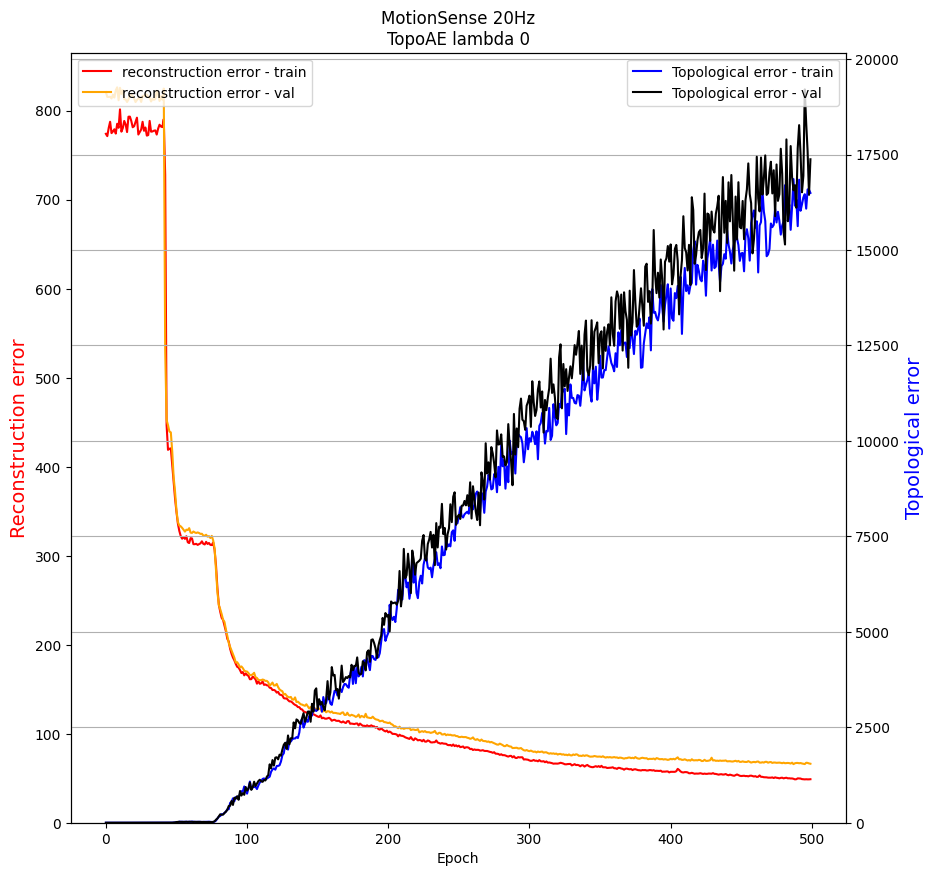

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:537.7524, Loss-ae:529.6785, Loss-topo:80.7391
Epoch:2, P:None, Loss:433.5910, Loss-ae:428.5221, Loss-topo:50.6882
Epoch:3, P:None, Loss:391.7044, Loss-ae:384.6138, Loss-topo:70.9060
Epoch:4, P:None, Loss:369.9795, Loss-ae:362.4549, Loss-topo:75.2459
Epoch:5, P:None, Loss:344.3035, Loss-ae:336.0389, Loss-topo:82.6465
Epoch:6, P:None, Loss:312.5833, Loss-ae:297.9786, Loss-topo:146.0475
Epoch:7, P:None, Loss:286.4405, Loss-ae:273.2348, Loss-topo:132.0573
Epoch:8, P:None, Loss:265.5349, Loss-ae:254.4242, Loss-topo:111.1067
Epoch:9, P:None, Loss:250.7891, Loss-ae:241.8654, Loss-topo:89.2380
Epoch:10, P:None, Loss:240.0868, Loss-ae:229.9135, Loss-topo:101.7333
Epoch:11, P:None, Loss:231.4181, Loss-ae:221.7619, Loss-topo:96.5619
Epoch:12, P:None, Loss:218.5091, Loss-ae:208.9005, Loss-topo:96.0855
Epoch:13, P:None, Loss:212.9955, Loss-ae:204.2686, Loss-topo:87.2692
Epoch:14, P:None, Loss:207.6102, Loss-ae:198.4263, Loss-topo:91.8382
Epoch:15, P:None, Loss:202.5551, Loss-a

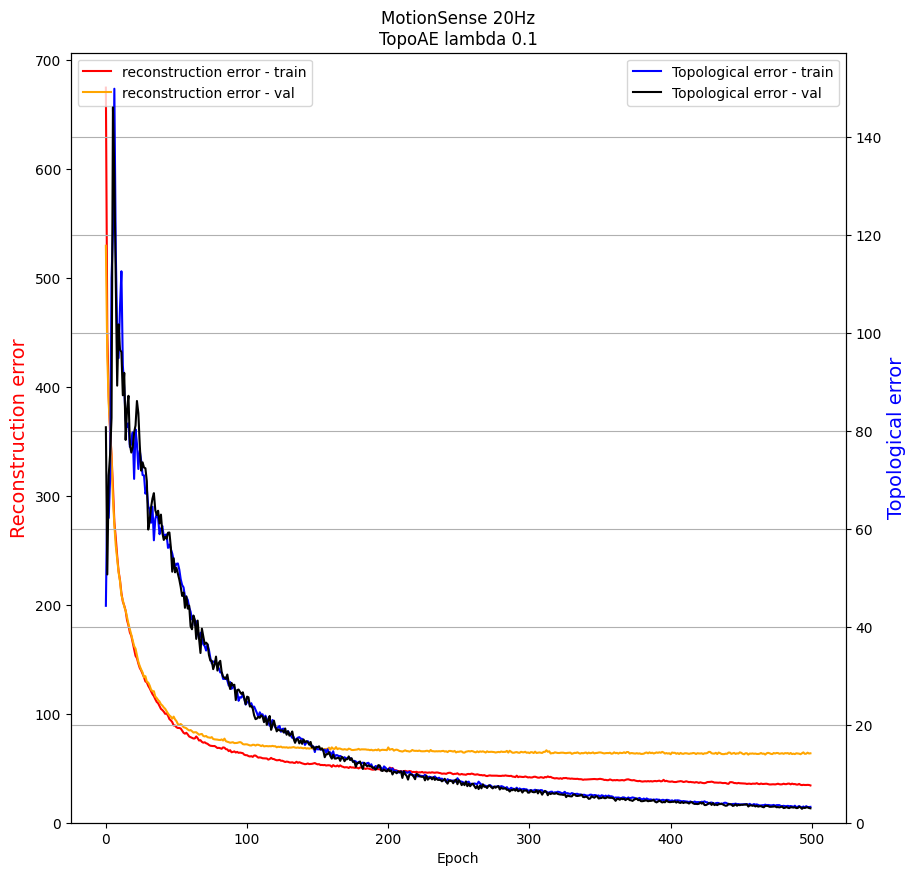

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:450.9986, Loss-ae:445.4967, Loss-topo:550.1911
Epoch:2, P:None, Loss:383.0267, Loss-ae:378.1929, Loss-topo:483.3706
Epoch:3, P:None, Loss:344.6790, Loss-ae:334.3016, Loss-topo:1037.7394
Epoch:4, P:None, Loss:291.1690, Loss-ae:274.2048, Loss-topo:1696.4181
Epoch:5, P:None, Loss:267.3974, Loss-ae:255.5979, Loss-topo:1179.9518
Epoch:6, P:None, Loss:250.5684, Loss-ae:240.5040, Loss-topo:1006.4455
Epoch:7, P:None, Loss:237.5024, Loss-ae:227.5258, Loss-topo:997.6643
Epoch:8, P:None, Loss:229.7074, Loss-ae:219.9968, Loss-topo:971.0627
Epoch:9, P:None, Loss:217.8555, Loss-ae:208.4257, Loss-topo:942.9804
Epoch:10, P:None, Loss:212.2484, Loss-ae:202.9340, Loss-topo:931.4474
Epoch:11, P:None, Loss:209.6960, Loss-ae:200.9208, Loss-topo:877.5128
Epoch:12, P:None, Loss:199.1358, Loss-ae:189.9173, Loss-topo:921.8504
Epoch:13, P:None, Loss:190.4190, Loss-ae:181.9621, Loss-topo:845.6898
Epoch:14, P:None, Loss:186.0988, Loss-ae:177.6998, Loss-topo:839.9011
Epoch:15, P:None, Loss:18

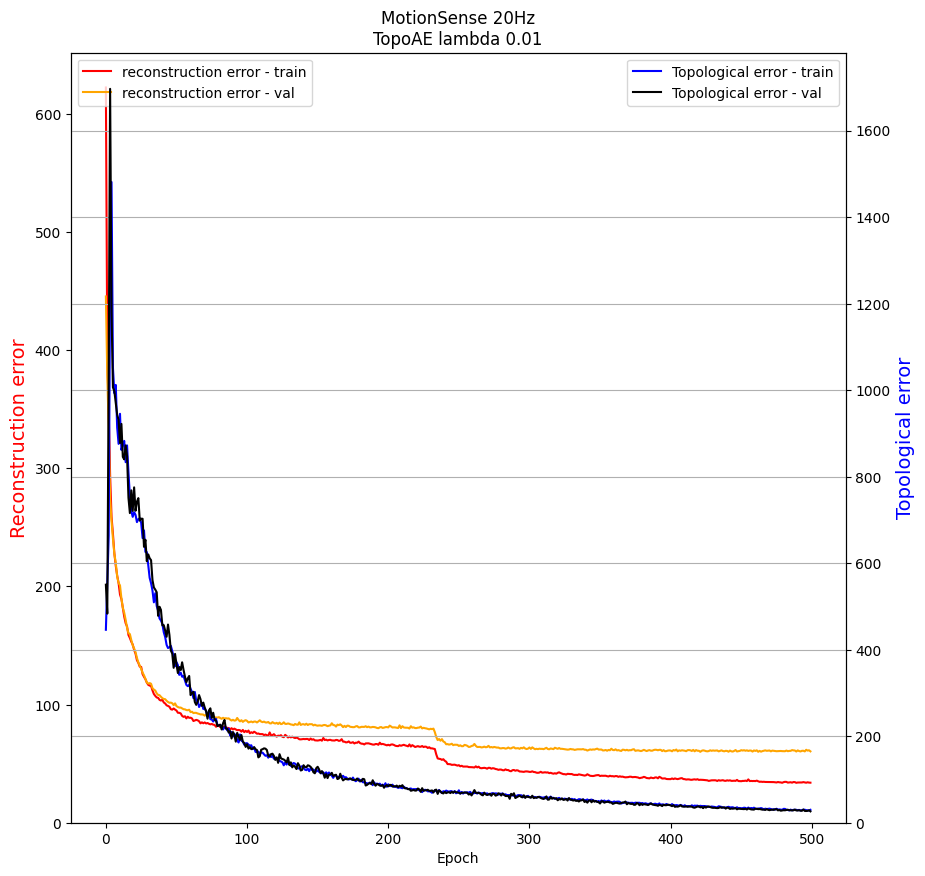

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:599.2778, Loss-ae:555.1233, Loss-topo:44.1545
Epoch:2, P:None, Loss:478.7305, Loss-ae:463.0853, Loss-topo:15.6452
Epoch:3, P:None, Loss:426.8545, Loss-ae:414.6482, Loss-topo:12.2063
Epoch:4, P:None, Loss:399.8212, Loss-ae:391.2226, Loss-topo:8.5987
Epoch:5, P:None, Loss:370.6855, Loss-ae:362.8283, Loss-topo:7.8572
Epoch:6, P:None, Loss:351.8418, Loss-ae:345.7734, Loss-topo:6.0683
Epoch:7, P:None, Loss:338.9922, Loss-ae:330.4724, Loss-topo:8.5198
Epoch:8, P:None, Loss:306.8124, Loss-ae:293.7216, Loss-topo:13.0908
Epoch:9, P:None, Loss:275.5617, Loss-ae:262.9139, Loss-topo:12.6479
Epoch:10, P:None, Loss:262.9689, Loss-ae:252.5854, Loss-topo:10.3835
Epoch:11, P:None, Loss:251.1626, Loss-ae:240.1629, Loss-topo:10.9998
Epoch:12, P:None, Loss:242.2706, Loss-ae:233.2274, Loss-topo:9.0432
Epoch:13, P:None, Loss:235.7932, Loss-ae:225.2685, Loss-topo:10.5247
Epoch:14, P:None, Loss:227.5177, Loss-ae:217.6367, Loss-topo:9.8810
Epoch:15, P:None, Loss:219.5856, Loss-ae:211.5585

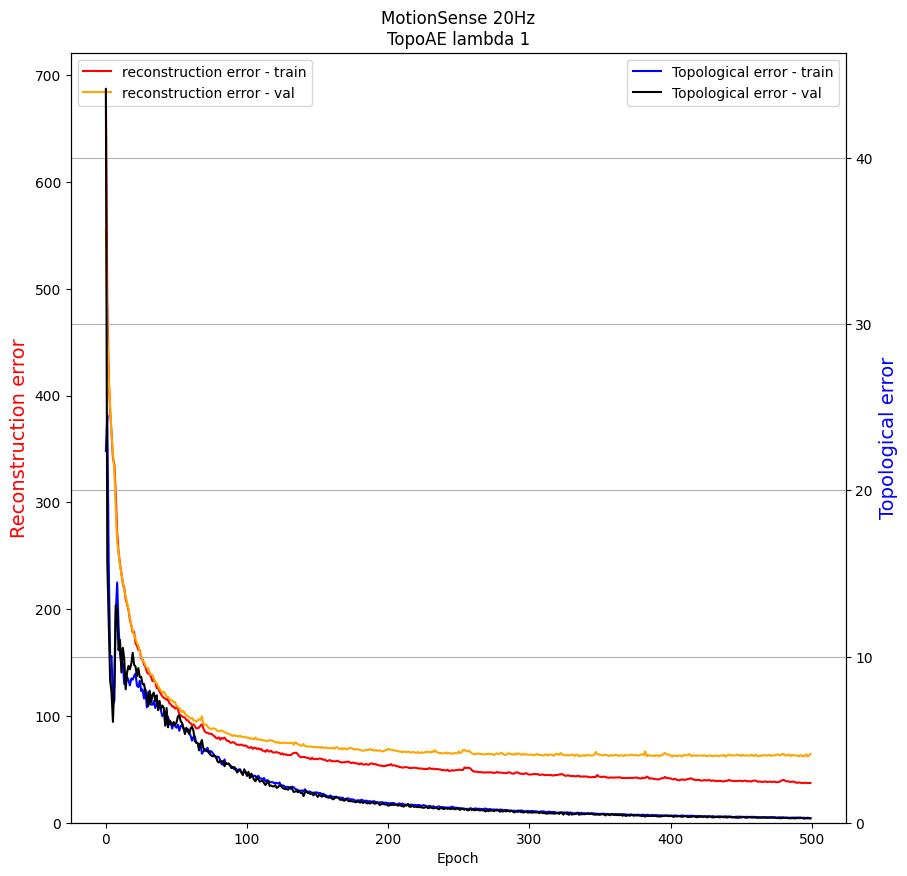

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:792.6430, Loss-ae:791.6313, Loss-topo:0.1012
Epoch:2, P:None, Loss:507.6664, Loss-ae:486.4863, Loss-topo:2.1180
Epoch:3, P:None, Loss:453.1290, Loss-ae:441.0540, Loss-topo:1.2075
Epoch:4, P:None, Loss:430.2973, Loss-ae:418.0279, Loss-topo:1.2269
Epoch:5, P:None, Loss:411.5307, Loss-ae:399.1806, Loss-topo:1.2350
Epoch:6, P:None, Loss:394.7813, Loss-ae:385.6036, Loss-topo:0.9178
Epoch:7, P:None, Loss:382.2830, Loss-ae:372.6949, Loss-topo:0.9588
Epoch:8, P:None, Loss:367.5026, Loss-ae:358.8864, Loss-topo:0.8616
Epoch:9, P:None, Loss:360.1738, Loss-ae:353.0373, Loss-topo:0.7136
Epoch:10, P:None, Loss:352.5812, Loss-ae:345.1837, Loss-topo:0.7398
Epoch:11, P:None, Loss:346.1146, Loss-ae:337.6856, Loss-topo:0.8429
Epoch:12, P:None, Loss:329.4758, Loss-ae:317.7437, Loss-topo:1.1732
Epoch:13, P:None, Loss:307.5444, Loss-ae:290.0354, Loss-topo:1.7509
Epoch:14, P:None, Loss:287.9606, Loss-ae:277.5589, Loss-topo:1.0402
Epoch:15, P:None, Loss:281.9765, Loss-ae:270.8779, Loss-t

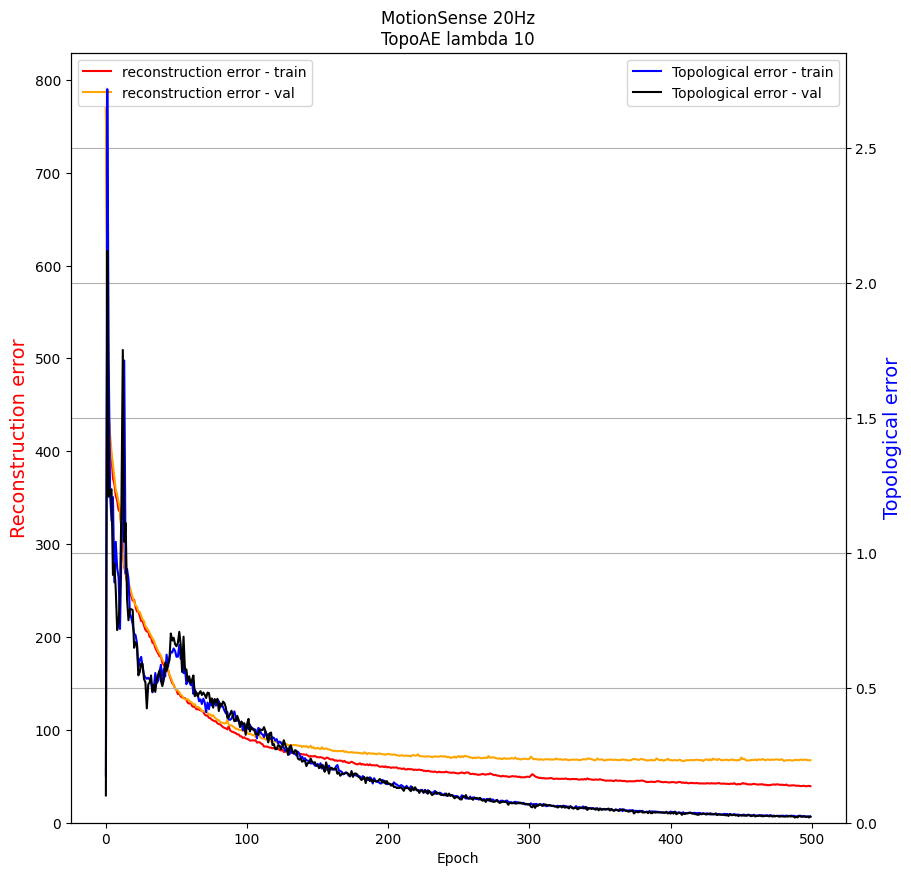

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:820.1705, Loss-ae:815.2204, Loss-topo:0.0495
Epoch:2, P:None, Loss:803.5957, Loss-ae:802.3568, Loss-topo:0.0124
Epoch:3, P:None, Loss:566.7235, Loss-ae:551.0720, Loss-topo:0.1565
Epoch:4, P:None, Loss:472.6267, Loss-ae:465.9764, Loss-topo:0.0665
Epoch:5, P:None, Loss:440.5502, Loss-ae:435.5945, Loss-topo:0.0496
Epoch:6, P:None, Loss:411.0717, Loss-ae:404.1119, Loss-topo:0.0696
Epoch:7, P:None, Loss:384.4590, Loss-ae:378.6753, Loss-topo:0.0578
Epoch:8, P:None, Loss:367.6837, Loss-ae:358.6794, Loss-topo:0.0900
Epoch:9, P:None, Loss:354.0687, Loss-ae:346.5522, Loss-topo:0.0752
Epoch:10, P:None, Loss:341.7848, Loss-ae:334.2763, Loss-topo:0.0751
Epoch:11, P:None, Loss:328.2177, Loss-ae:320.4097, Loss-topo:0.0781
Epoch:12, P:None, Loss:305.4937, Loss-ae:297.1104, Loss-topo:0.0838
Epoch:13, P:None, Loss:286.1887, Loss-ae:274.2962, Loss-topo:0.1189
Epoch:14, P:None, Loss:269.9383, Loss-ae:260.8393, Loss-topo:0.0910
Epoch:15, P:None, Loss:260.0587, Loss-ae:249.5224, Loss-t

KeyboardInterrupt: 

In [18]:
import pickle

# Variables to reuse
save_id = 1
model_name = 'ConvolutionalAutoencoder_custom_dim3'
model_dim = 10
model_epc = 500
model_lams = [0, 0.1, 0.01, 1, 10, 100, 1000]

for model_lam in model_lams:
    # Training model
    topo_reducer = CustomTopoDimRedTransform(
        model_name=model_name,
        model_lambda=model_lam,
        patience=None,
        num_epochs=model_epc,
        from_dim=180,
        to_dim=model_dim
    )

    title_plot = "MotionSense 20Hz\nTopoAE lambda {}".format(model_lam)
    topo_reducer.fit(train_HD, train_Y, title_plot=title_plot)

    # Variables to reuse
    filename = 'data/{}_{}_{}_{}_{}.pkl'.format(model_name, model_lam, model_dim, model_epc, save_id)

    filehandler = open(filename, 'wb')
    pickle.dump(topo_reducer, filehandler)
    filehandler.close()